<a href="https://colab.research.google.com/github/MariaKitty/practic/blob/main/practic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки и загружаем датасет.

In [1]:
import pandas as pd
import numpy as np
db = pd.read_csv('/content/sample_data/Cost_of_Living_Index_by_Country_2024.csv')

Вывод первых трех строк:

In [2]:
db.head(3)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3


Вывод последних трех строк:

In [3]:
db.tail(3)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0
120,121,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1


Случайная выборка строк:

In [4]:
db.sample(3)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
56,57,Jordan,41.2,7.2,24.9,37.1,34.8,45.5
90,91,Brazil,30.2,7.9,19.5,29.5,22.6,37.2
107,108,Iran,26.4,8.5,17.8,22.0,16.3,26.0


Атрибуты датасета:

In [5]:
db.columns.tolist()

['Rank',
 'Country',
 'Cost of Living Index',
 'Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index']

Информация о датасете и использование памяти:

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


Количество ненулевых значений (здесь понятно, что датасет содержит все ненулевые значения):

In [6]:
np.count_nonzero(db)

968

Отображение датасета:

In [7]:
db

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


Приведем все столбцы к нижнему регистру:

In [8]:
db_rename = db.rename(columns={'Rank': 'rank', 'Country': 'country', 'Cost of Living Index': 'cost_of_living_index',
                               'Rent Index': 'rent_index', 'Cost of Living Plus Rent Index': 'cost_of_living_plus_rent_index',
                               'Groceries Index': 'groceries_index', 'Restaurant Price Index': 'restaurant_price_index',
                               'Local Purchasing Power Index': 'local_purchasing_power_index'})

Изменим тип данных столбца "country", так как потребуется индексировать потом датасет по этому столбцу:

In [9]:
db_new = db_rename.convert_dtypes()
db_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank                            121 non-null    Int64  
 1   country                         121 non-null    string 
 2   cost_of_living_index            121 non-null    Float64
 3   rent_index                      121 non-null    Float64
 4   cost_of_living_plus_rent_index  121 non-null    Float64
 5   groceries_index                 121 non-null    Float64
 6   restaurant_price_index          121 non-null    Float64
 7   local_purchasing_power_index    121 non-null    Float64
dtypes: Float64(6), Int64(1), string(1)
memory usage: 8.5 KB


Проверим датасет на наличие пропусков:

In [10]:
db_new.isnull().sum()

,0
rank,0
country,0
cost_of_living_index,0
rent_index,0
cost_of_living_plus_rent_index,0
groceries_index,0
restaurant_price_index,0
local_purchasing_power_index,0


Проверим датасет на наличие дубликатов:

In [11]:
int(db_new.duplicated().sum())

0

Индексация по координаторам:

In [12]:
db_new.loc[:3]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1


In [13]:
db_new.loc[56:]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
56,57,Jordan,41.2,7.2,24.9,37.1,34.8,45.5
57,58,Armenia,41.0,19.0,30.5,36.0,38.9,38.5
58,59,Poland,40.8,17.1,29.5,36.8,35.0,85.8
59,60,Mexico,40.2,15.5,28.4,43.4,35.7,45.4
60,61,El Salvador,39.5,14.6,27.6,43.4,29.6,31.9
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [14]:
db_new.loc[35:37]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
35,36,Estonia,52.0,15.0,34.2,46.4,50.6,80.4
36,37,Qatar,51.3,36.1,44.0,43.9,47.2,161.1
37,38,Slovenia,49.9,18.7,34.9,49.0,43.4,80.9


In [15]:
db_new.loc[12, 'country']

'New Zealand'

In [16]:
db_new.loc[:,'rank':'rent_index']

,rank,country,cost_of_living_index,rent_index
0,1,Switzerland,101.1,46.5
1,2,Bahamas,85.0,36.7
2,3,Iceland,83.0,39.2
3,4,Singapore,76.7,67.2
4,5,Barbados,76.6,19.0
...,...,...,...,...
116,117,Bangladesh,22.5,2.4
117,118,India,21.2,5.6
118,119,Egypt,21.0,3.7
119,120,Libya,20.4,4.3


Логическая индексация:

In [17]:
db_new.loc[db_new['cost_of_living_index']>50]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
9,10,Australia,70.2,33.4,52.5,77.3,62.5,127.4


In [18]:
db_new.loc[(db_new['groceries_index']>70) & (db_new['rank']>20)]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
23,24,South Korea,60.1,16.0,38.9,81.4,31.4,109.4


In [19]:
db_new.loc[(db_new['restaurant_price_index']<90) & (db_new['restaurant_price_index']>70)]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2


In [20]:
db_new.loc[(db_new['restaurant_price_index'] < 40) | (db_new['cost_of_living_plus_rent_index'] < 50)]

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
10,11,Austria,65.1,22.5,44.7,66.4,59.3,102.4
11,12,Canada,64.8,33.2,49.6,71.2,61.7,103.7
12,13,New Zealand,64.6,25.9,46.0,71.9,57.1,121.0
14,15,France,63.7,21.0,43.2,69.5,56.3,102.4
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [21]:
db_new.loc[db_new['country'] == 'Russia']

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
88,89,Russia,31.0,10.0,20.9,28.8,28.0,50.6


Сортировка данных:

In [22]:
db_new.sort_values('cost_of_living_index', ascending=False)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [23]:
db_new.sort_values('rent_index', ascending=True)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
120,121,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1
111,112,Nepal,25.5,3.5,15.0,25.6,16.2,25.4
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
114,115,Syria,24.0,3.7,14.2,24.5,15.3,5.5
...,...,...,...,...,...,...,...,...
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
13,14,Ireland,64.4,42.3,53.8,59.3,65.3,101.1
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3


In [24]:
db_new.sort_values('cost_of_living_plus_rent_index', ascending=False)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
...,...,...,...,...,...,...,...,...
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [25]:
db_new.sort_values('groceries_index', ascending=False)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
23,24,South Korea,60.1,16.0,38.9,81.4,31.4,109.4
...,...,...,...,...,...,...,...,...
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0
107,108,Iran,26.4,8.5,17.8,22.0,16.3,26.0
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0


In [26]:
db_new.sort_values('restaurant_price_index', ascending=False)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
...,...,...,...,...,...,...,...,...
113,114,Madagascar,24.5,7.8,16.5,24.1,14.3,15.6
100,101,Algeria,28.9,3.8,16.9,36.8,14.0,29.9
106,107,Indonesia,26.7,7.7,17.6,33.4,13.5,31.7
120,121,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1


In [27]:
db_new.sort_values('local_purchasing_power_index', ascending=True)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
42,43,Cuba,46.7,11.8,29.9,43.0,26.0,2.3
114,115,Syria,24.0,3.7,14.2,24.5,15.3,5.5
71,72,Cameroon,37.3,16.9,27.5,34.6,35.3,10.5
85,86,Nigeria,31.4,22.1,27.0,37.5,20.6,11.0
64,65,Venezuela,38.3,5.8,22.7,39.5,37.7,14.7
...,...,...,...,...,...,...,...,...
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
36,37,Qatar,51.3,36.1,44.0,43.9,47.2,161.1
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8


Фильрация данных при помощи метода query:

In [28]:
db_new.query("rank > 50")

/tmp/ipython-input-28-1849514379.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("rank > 50")


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
50,51,Oman,42.4,12.2,27.9,39.9,33.1,139.8
51,52,Kuwait,42.1,22.6,32.7,34.5,36.4,161.8
52,53,Albania,42.1,10.6,27.0,42.0,35.7,39.9
53,54,Lebanon,41.8,13.4,28.1,32.2,37.1,25.4
54,55,Hungary,41.7,11.3,27.1,39.8,37.0,63.4
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [29]:
name = "Sweden"
db_new.query("country == @name")

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
24,25,Sweden,59.3,20.9,40.9,60.8,54.7,122.6


In [30]:
db_new.query("country.str.startswith('N') or country.str.endswith('y')")

/tmp/ipython-input-30-991160436.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("country.str.startswith('N') or country.str.endswith('y')")


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
12,13,New Zealand,64.6,25.9,46.0,71.9,57.1,121.0
17,18,Netherlands,63.1,33.5,48.9,59.9,61.2,124.9
20,21,Germany,62.2,24.4,44.0,60.8,52.8,120.2
25,26,Italy,56.2,19.2,38.5,57.0,53.3,78.3
28,29,Uruguay,54.1,13.8,34.8,52.1,50.2,56.3
54,55,Hungary,41.7,11.3,27.1,39.8,37.0,63.4
69,70,Turkey,37.4,13.2,25.8,37.6,30.7,49.0
81,82,North Macedonia,33.0,6.5,20.3,32.1,22.1,51.0
85,86,Nigeria,31.4,22.1,27.0,37.5,20.6,11.0


Фильтрация данных при помощи оператора where:

In [31]:
db_new.query("country.str.startswith('R') and country.str.endswith('a')").where(db_new['rent_index'] == 10)

/tmp/ipython-input-31-2890696282.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("country.str.startswith('R') and country.str.endswith('a')").where(db_new['rent_index'] == 10)


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
68,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
88,89,Russia,31.0,10.0,20.9,28.8,28.0,50.6


In [32]:
db_new.query("rank > 30 and rank < 60").where(db_new['rank'] == 50)

/tmp/ipython-input-32-3851328508.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_new.query("rank > 30 and rank < 60").where(db_new['rank'] == 50)


,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
30,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
31,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
33,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
34,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
35,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
36,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
37,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
38,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
39,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [33]:
db_new.where(db_new['local_purchasing_power_index'] > 100)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...
116,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
117,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
118,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
119,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [34]:
db_new.where(db_new['country'].str.startswith('I'))

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...
116,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
119,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [35]:
db_new.where(db_new['groceries_index'] > 100)

,rank,country,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...
116,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
117,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
118,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
119,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Построение сводной таблицы при помощи метода groupby:

In [36]:
db_groupby = db_new.groupby(['rank', 'country']).agg('mean').sort_values(by='cost_of_living_plus_rent_index', ascending=False).head(10)
db_groupby

,,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
rank,country,,,,,,
1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
9,United States,70.4,41.7,56.6,75.0,67.2,142.3
14,Ireland,64.4,42.3,53.8,59.3,65.3,101.1
10,Australia,70.2,33.4,52.5,77.3,62.5,127.4
6,Norway,76.0,26.2,52.1,79.0,73.5,114.7


Построение сводной таблицы при помощи pivot_table:

In [37]:
db_pivot_table = db_new.pivot_table(index=['country', 'cost_of_living_plus_rent_index'])
db_pivot_table.query("`cost_of_living_index`>40 and `rent_index`>40").sort_values(by='cost_of_living_plus_rent_index', ascending=False)

/tmp/ipython-input-37-3518025919.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  db_pivot_table.query("`cost_of_living_index`>40 and `rent_index`>40").sort_values(by='cost_of_living_plus_rent_index', ascending=False)


,,cost_of_living_index,groceries_index,local_purchasing_power_index,rank,rent_index,restaurant_price_index
country,cost_of_living_plus_rent_index,,,,,,
Switzerland,74.9,101.1,109.1,158.7,1.0,46.5,97.0
Singapore,72.1,76.7,74.6,111.1,4.0,67.2,50.4
Hong Kong (China),65.3,70.8,84.6,109.3,8.0,59.4,46.2
United States,56.6,70.4,75.0,142.3,9.0,41.7,67.2
Ireland,53.8,64.4,59.3,101.1,14.0,42.3,65.3
Luxembourg,51.9,62.4,64.1,182.5,20.0,40.5,68.7
United Arab Emirates,48.9,55.8,45.3,127.9,27.0,41.3,49.2


In [38]:
db_pivot = db_new.pivot_table(index=['country', 'cost_of_living_plus_rent_index'], values=['cost_of_living_index', 'rent_index'],
                                aggfunc=[np.mean, np.median])
db_pivot.head(10)

/tmp/ipython-input-38-1838265410.py:1: FutureWarning: The provided callable <function mean at 0x7df4af3ea3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  db_pivot = db_new.pivot_table(index=['country', 'cost_of_living_plus_rent_index'], values=['cost_of_living_index', 'rent_index'],
/tmp/ipython-input-38-1838265410.py:1: FutureWarning: The provided callable <function median at 0x7df4ac63b6a0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  db_pivot = db_new.pivot_table(index=['country', 'cost_of_living_plus_rent_index'], values=['cost_of_living_index', 'rent_index'],


mean             \
                                          cost_of_living_index rent_index   
country    cost_of_living_plus_rent_index                                   
Albania    27.0                                           42.1       10.6   
Algeria    16.9                                           28.9        3.8   
Argentina  18.9                                           29.4        7.6   
Armenia    30.5                                           41.0       19.0   
Australia  52.5                                           70.2       33.4   
Austria    44.7                                           65.1       22.5   
Azerbaijan 20.4                                           31.2        8.7   
Bahamas    61.8                                           85.0       36.7   
Bahrain    37.0                                           52.3       20.5   
Bangladesh 12.8                                           22.5        2.4   

                                                        median             
                                          cost_of_living_index rent_index  
country    cost_of_living_plus_rent_index                                  
Albania    27.0                                           42.1       10.6  
Algeria    16.9                                           28.9        3.8  
Argentina  18.9                                           29.4        7.6  
Armenia    30.5                                           41.0       19.0  
Australia  52.5                                           70.2       33.4  
Austria    44.7                                           65.1       22.5  
Azerbaijan 20.4                                           31.2        8.7  
Bahamas    61.8                                           85.0       36.7  
Bahrain    37.0                                           52.3       20.5  
Bangladesh 12.8                                           22.5        2.4

Сгруппируем данные по определенному столбцу и вычислим агрегатные функции:

In [39]:
db_group1 = db_new.groupby(['rank','country']).agg('mean')
db_group1

,,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
rank,country,,,,,,
1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...
117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
118,India,21.2,5.6,13.7,23.8,15.1,82.6
119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0


In [40]:
db_group2 = db_new.groupby(['restaurant_price_index','country']).agg('sum')
db_group2

,,rank,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,local_purchasing_power_index
restaurant_price_index,country,,,,,,
12.8,Bangladesh,117,22.5,2.4,12.8,25.7,33.1
12.9,Pakistan,121,18.8,2.8,11.1,17.5,29.1
13.5,Indonesia,107,26.7,7.7,17.6,33.4,31.7
14.0,Algeria,101,28.9,3.8,16.9,36.8,29.9
14.3,Madagascar,114,24.5,7.8,16.5,24.1,15.6
...,...,...,...,...,...,...,...
73.5,Norway,6,76.0,26.2,52.1,79.0,114.7
81.3,Denmark,7,72.3,26.4,50.2,64.8,127.2
83.3,Bahamas,2,85.0,36.7,61.8,81.6,54.6


In [41]:
db_group3 = db_new.groupby(['restaurant_price_index','country']).agg('min')
db_group3

,,rank,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,local_purchasing_power_index
restaurant_price_index,country,,,,,,
12.8,Bangladesh,117,22.5,2.4,12.8,25.7,33.1
12.9,Pakistan,121,18.8,2.8,11.1,17.5,29.1
13.5,Indonesia,107,26.7,7.7,17.6,33.4,31.7
14.0,Algeria,101,28.9,3.8,16.9,36.8,29.9
14.3,Madagascar,114,24.5,7.8,16.5,24.1,15.6
...,...,...,...,...,...,...,...
73.5,Norway,6,76.0,26.2,52.1,79.0,114.7
81.3,Denmark,7,72.3,26.4,50.2,64.8,127.2
83.3,Bahamas,2,85.0,36.7,61.8,81.6,54.6


In [42]:
db_group4 = db_new.groupby(['restaurant_price_index','country']).agg('max')
db_group4

,,rank,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,local_purchasing_power_index
restaurant_price_index,country,,,,,,
12.8,Bangladesh,117,22.5,2.4,12.8,25.7,33.1
12.9,Pakistan,121,18.8,2.8,11.1,17.5,29.1
13.5,Indonesia,107,26.7,7.7,17.6,33.4,31.7
14.0,Algeria,101,28.9,3.8,16.9,36.8,29.9
14.3,Madagascar,114,24.5,7.8,16.5,24.1,15.6
...,...,...,...,...,...,...,...
73.5,Norway,6,76.0,26.2,52.1,79.0,114.7
81.3,Denmark,7,72.3,26.4,50.2,64.8,127.2
83.3,Bahamas,2,85.0,36.7,61.8,81.6,54.6


Основные статистические показатели:

In [50]:
db_new.describe()

,rank,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
count,121.0,121.0,121.0,121.0,121.0,121.0,121.0
mean,61.0,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.25811,39.569094
min,1.0,18.8,2.4,11.1,17.5,12.8,2.3
25%,31.0,30.2,8.5,19.8,31.6,21.6,34.8
50%,61.0,39.5,12.4,27.0,40.5,33.1,50.6
75%,91.0,52.8,20.1,37.0,53.7,47.2,99.4
max,121.0,101.1,67.2,74.9,109.1,97.0,182.5


In [101]:
db_new.loc[:,['rank','cost_of_living_index','rent_index','cost_of_living_plus_rent_index',
              'groceries_index','restaurant_price_index','local_purchasing_power_index']].median()

,0
rank,61.0
cost_of_living_index,39.5
rent_index,12.4
cost_of_living_plus_rent_index,27.0
groceries_index,40.5
restaurant_price_index,33.1
local_purchasing_power_index,50.6


In [102]:
db_new.loc[:,['rank','cost_of_living_index','rent_index','cost_of_living_plus_rent_index',
              'groceries_index','restaurant_price_index','local_purchasing_power_index']].mode()

,rank,cost_of_living_index,rent_index,cost_of_living_plus_rent_index,groceries_index,restaurant_price_index,local_purchasing_power_index
0,1,26.4,7.7,18.9,25.4,20.6,25.4
1,2,<NA>,<NA>,48.9,36.8,<NA>,37.2
2,3,<NA>,<NA>,<NA>,<NA>,<NA>,56.9
3,4,<NA>,<NA>,<NA>,<NA>,<NA>,102.4
4,5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...
116,117,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
117,118,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
118,119,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
119,120,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Построение матрицы корреляции:

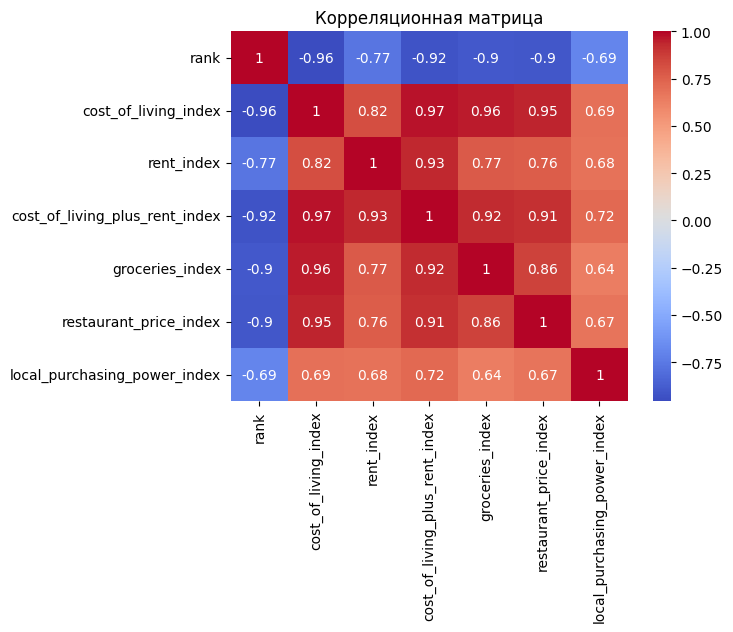

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(db_new.loc[:,['rank','cost_of_living_index','rent_index','cost_of_living_plus_rent_index',
              'groceries_index','restaurant_price_index','local_purchasing_power_index']].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()